# 第3章 一般化線型モデル(GLM) ～ポアソン回帰～

**説明変数**を組み込んだ統計モデルについて説明

**ポアソン回帰**(Poisson regression)$\cdots$個体ごとに異なる説明変数(個体の属性)によって平均種子数が変化する.  
$\rightarrow$第2章ではどの個体の種子数$y_i$も平均$\lambda$のポアソン分布にしたがうと仮定

**一般化線形モデル**(Generalized Linear Model)$\cdots$$\uparrow$と似たような構造の統計モデルを総称してこう呼ぶ.

## 例題

* 植物個体$\cdots$$i$
* 種子数$\cdots$$y_i$
* **体サイズ**(body size)$\cdots$$x_i$　　\# 植物の大きさの大小を表す正の実数

* 処理$C$$\cdots$全個体のうち50個体($i\in\{1, 2, \cdots, 50\}$)は処理しない
* 処理$T$$\cdots$残り50個体($i\in\{51, 52, \cdots, 100\}$)は施肥処理(肥料を加える)する


### 観測されたデータの概要を調べる

In [1]:
d <- read.csv("http://hosho.ees.hokudai.ac.jp/~kubo/stat/iwanamibook/fig/poisson/data3a.csv")
d

y,x,f
6,8.31,C
6,9.44,C
6,9.50,C
12,9.07,C
10,10.16,C
4,8.32,C
9,10.61,C
9,10.06,C
9,9.93,C
11,10.43,C


In [2]:
d$x

[1]  8.31  9.44  9.50  9.07 10.16  8.32 10.61 10.06  9.93 10.43 10.36 10.15
 [13] 10.92  8.85  9.42 11.11  8.02 11.93  8.55  7.19  9.83 10.79  8.89 10.09
 [25] 11.63 10.21  9.45 10.44  9.44 10.48  9.43 10.32 10.33  8.50  9.41  8.96
 [37]  9.67 10.26 10.36 11.80 10.94 10.25  8.74 10.46  9.37  9.74  8.95  8.74
 [49] 11.32  9.25 10.14  9.05  9.89  8.76 12.04  9.91  9.84 11.87 10.16  9.34
 [61] 10.17 10.99  9.19 10.67 10.96 10.55  9.69 10.91  9.60 12.37 10.54 11.30
 [73] 12.40 10.18  9.53 10.24 11.76  9.52 10.40  9.96 10.30 11.54  9.42 11.28
 [85]  9.73 10.78 10.21 10.51 10.73  8.85 11.20  9.86 11.54 10.03 11.88  9.15
 [97]  8.52 10.24 10.86  9.97

In [3]:
d$y

[1]  6  6  6 12 10  4  9  9  9 11  6 10  6 10 11  8  3  8  5  5  4 11  5 10  6
 [26]  6  7  9  3 10  2  9 10  5 11 10  4  8  9 12  8  9  8  6  6 10 10  9 12  6
 [51] 14  6  7  9  6  7  9 13  9 13  7  8 10  7 12  6 15  3  4  6 10  8  8  7  5
 [76]  6  8  9  9  6  7 10  6 11 11 11  5  6  4  5  6  5  8  5  9  8  6  8  7  9

In [4]:
d$f

[1] C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C
 [38] C C C C C C C C C C C C C T T T T T T T T T T T T T T T T T T T T T T T T
 [75] T T T T T T T T T T T T T T T T T T T T T T T T T T
Levels: C T

-----

#### class()関数を使うとデータオブジェクトの型を調べられる

In [5]:
class(d)

[1] "data.frame"

In [6]:
class(d$y)

[1] "integer"

In [7]:
class(d$x)

[1] "numeric"

In [8]:
class(d$f)

[1] "factor"

-----

#### summary()関数を使うとデータフレイムの概要が分かる

In [9]:
summary(d)

       y               x          f     
 Min.   : 2.00   Min.   : 7.190   C:50  
 1st Qu.: 6.00   1st Qu.: 9.428   T:50  
 Median : 8.00   Median :10.155         
 Mean   : 7.83   Mean   :10.089         
 3rd Qu.:10.00   3rd Qu.:10.685         
 Max.   :15.00   Max.   :12.400         

-----

### 統計モデリングの前にデータを図示する

**散布図**(scatter plot)  
* 横軸に$x$列
* 縦軸に$y$列

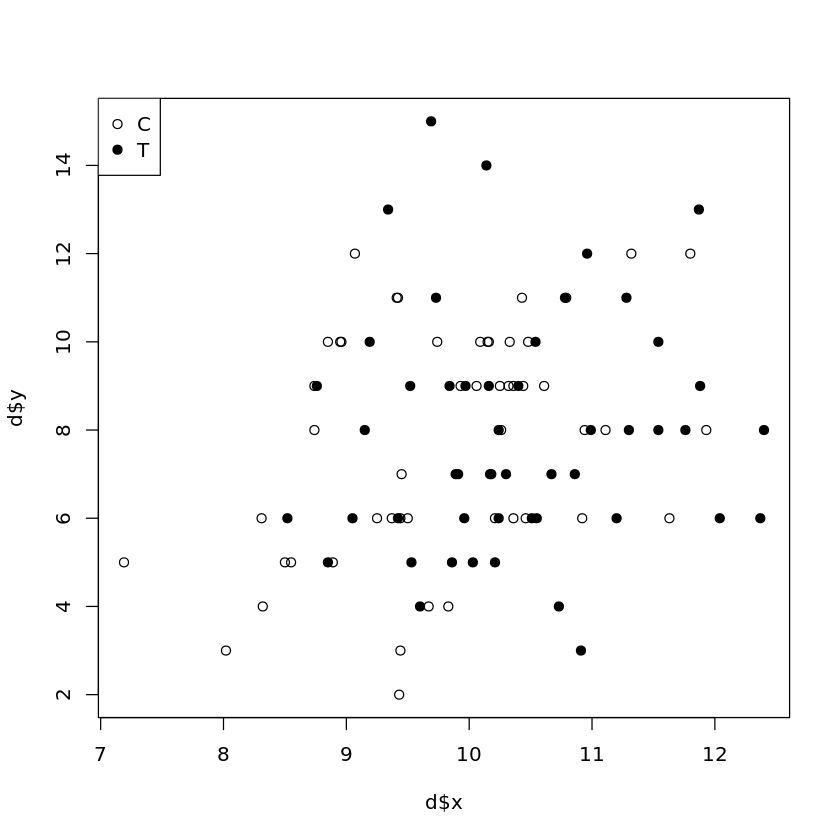

In [10]:
plot(d$x, d$y, pch = c(21, 19)[d$f])
legend("topleft", legend = c("C", "T"), pch = c(21,19))

**箱ひげ図**(box-whisker plot)  
* 横軸が因子型(factor)$\rightarrow$$f$列

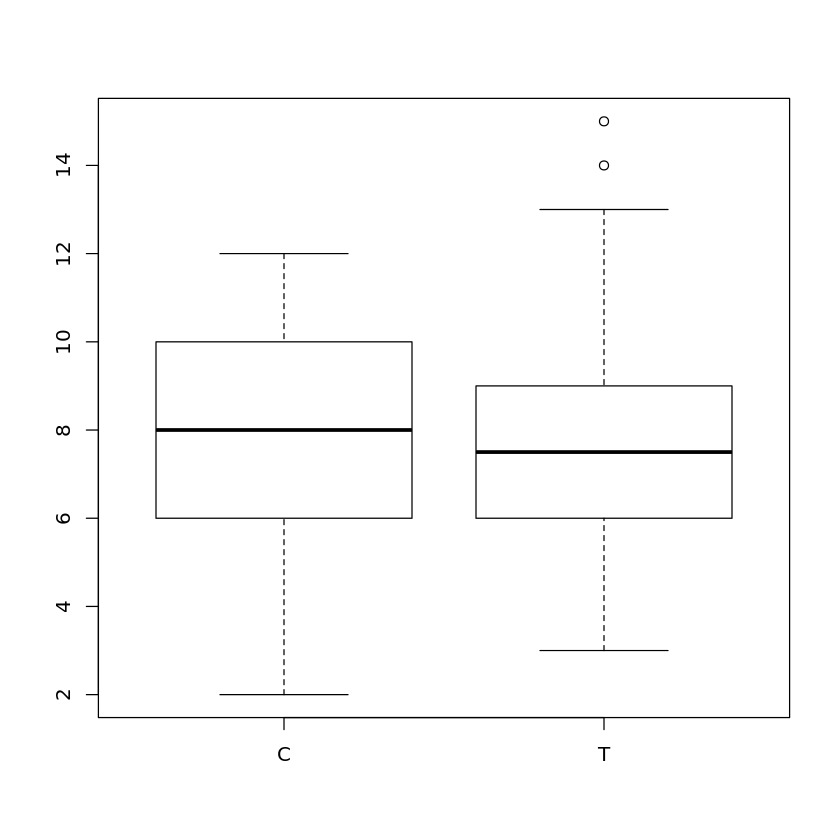

In [11]:
plot(d$f, d$y)

#### 図を見てわかること?

* 体サイズ$x$が増加するにつれて種子数$y$が増えているように見えるけど…はっきりしない
* 肥料の効果$f$はあまりはっきりしない

#### デフォルトで箱ひげ図になる

分布のゆがみなども図示されるのでよく見かける「平均$\pm$標準偏差」より優れている.  
$\rightarrow$「標本分布をよく見ろ」ということ…?

-----

## ポアソン回帰の統計モデル

まず最初に個体$i$の体サイズ$x_i$だけに依存する統計モデルについて考えてみる.  
  * 説明変数$\cdots$$x_i$
  * 応答変数$\cdots$$y_i$
  * 施肥効果$f_i$は種子数に影響無さそうなのでここでは無視する
  
ある個体$i$において種子数が$y_i$である確率$p(y_i \mid \lambda_i)$はポアソン分布に従う.

$$p(y_i \mid \lambda_i) = \frac{\lambda^{y_i}_i exp(-\lambda_i)}{y_i!}$$


個体ごとに異なる平均$\lambda_i$を説明変数$x_i$の関数として定義しなければならない.  
ある個体$i$の平均種子数$\lambda_i$を

　　$\lambda_i = exp(\beta_1 + \beta_2x_i)$

とする. この時, 
  * **パラメータ**(parameter)$\cdots \beta_1, \beta_2$  　　# **係数**(coefficient)とも
  * **切片**(intercept)$\cdots$$\beta_1$
  * **傾き**(slope)$\cdots$$\beta_2$
  * 説明変数を**共変量**(covariate)と呼ぶ場合も

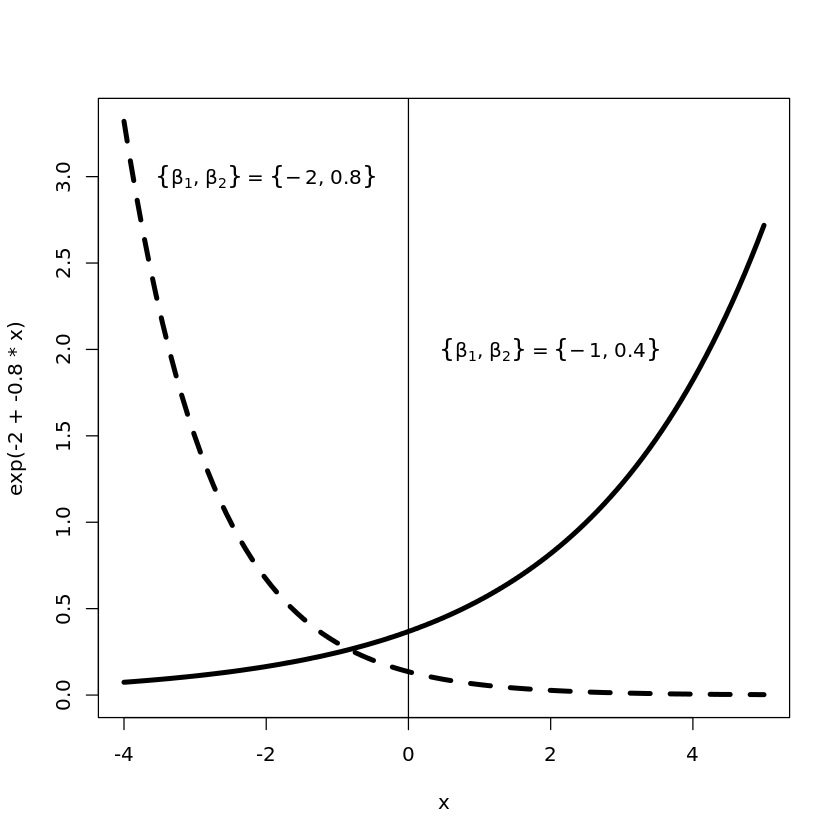

In [12]:
curve(exp(-2 + -0.8 * x), from = -4 , to = 5, lwd = 4, lty = 2)
curve(exp(-1 + 0.4 * x), add = TRUE, lwd = 4)
abline(v = 0:0)
text(-2,3,expression(paste(group("{",list(beta[1],beta[2]) ,"}") == group("{",list(-2, 0.8),"}"))))
text(2,2,expression(group("{",list(beta[1],beta[2]) ,"}") == group("{",list(-1, 0.4),"}")))

上の式を変形して, 

　　$log\lambda_i = \beta_1 + \beta_2x_i$

この時, 
  * **線形予測子**(linear predictor)$\cdots$右辺の$\beta_1 + \beta_2x_i$
    * この式が$\{\beta_1, \beta_2, \beta_3\}$の線形結合になっているから
  * **リンク関数(link function)**$\cdots$($\lambda_i$の関数) = (線形予測子)の時, 左辺の「関数」
    * 今回は対数関数を指定しているので, **対数リンク関数**(log link function)と呼ばれる
      * ポアソン回帰を使用する場合, 大抵使用される
      * 数学的に都合の良い性質があるので**正準リンク関数**(canonical link function)と呼ばれる
        * 「推定計算に都合良い」$\cdots$$\lambda_i = exp(線形予測子) \geq 0$
        * 分かりやすい$\cdots$要因の効果が積で表されるから→後述
        * Rのglm()は何も指定しなければ正準リンク関数が使用される


-----

### あてはめとあてはまりの良さ

* ポアソン回帰…観測データに対するポアソン分布を使った**あてはめ**(fitting)
  * 対数尤度$log L$が最大になるパラメータ$\hat{\beta}_1, \hat{\beta}_2$の推定値を決めること

データ$\bf Y$のもとでの対数尤度  
$$log L(\beta_1, \beta_2) = \sum_{i}log \frac{\lambda^{y_i}_i exp(-\lambda_i)}{y_i!}$$

複数のパラメータ$\{\beta_1, \beta_2\}$を同時に扱うので, 最尤推定量の導出は難しい.  
→実際のポアソン回帰は大抵数値的な試行錯誤で最尤推定値を探し出す  
　→解析的に導出出来なくても問題ない  
→Rだと簡単にGLMのあてはめが出来る

In [13]:
fit <- glm(y ~ x, data = d, family = poisson)
fit


Call:  glm(formula = y ~ x, family = poisson, data = d)

Coefficients:
(Intercept)            x  
    1.29172      0.07566  

Degrees of Freedom: 99 Total (i.e. Null);  98 Residual
Null Deviance:	    89.51 
Residual Deviance: 84.99 	AIC: 474.8

* 関数内での値の指定を**引数**(argument)と言う
  * dが引数でdataは仮引数
    * y ~ xもfomula = y ~ xの省略

In [14]:
summary(fit)


Call:
glm(formula = y ~ x, family = poisson, data = d)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3679  -0.7348  -0.1775   0.6987   2.3760  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.29172    0.36369   3.552 0.000383 ***
x            0.07566    0.03560   2.125 0.033580 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 89.507  on 99  degrees of freedom
Residual deviance: 84.993  on 98  degrees of freedom
AIC: 474.77

Number of Fisher Scoring iterations: 4


#### summary()の読み方

* (Intercept)$\cdots$切片$\beta_1$に対応
* x$\cdots$傾き$\beta_2$に対応
* Estimate$\cdots$推定値のこと
* Std.Error$\cdots$**標準誤差**(Standard Error)の推定値のこと
  * 推定値$\hat{\beta}_1, \hat{\beta}_2$の「ばらつき」を標準偏差で表したもの
  * SEの推定値は, 下記を仮定すれば得られる
    * 対数尤度は最尤推定値で最大となる凸関数
    * 推定のばらつきが正規分布である
    * 対数尤度関数は最大値付近でそのカタチが正規分布に近い


* z value$\cdots$z値と呼ばれる統計量. $\frac{最尤推定値}{SE}$
  * **Wald統計量**(Wald statistics)とも呼ばれる
* $Pr(> \mid z \mid)\cdots$平均がz値の絶対値で標準偏差が1の正規分布におけるマイナス無限大までの値を取る確率の2倍
  * $\int_{-\infty}^{0}\frac{1}{\sqrt{2\pi}}exp[-\frac{(x-\mid z \mid)^2}{2}] \times 2$$\cdots$?
    * 正規分布が$\int_{-\infty}^{\infty}\frac{1}{\sqrt{2\pi\sigma^2}}exp[-\frac{(x-\mu)^2}{2\sigma^2}]$
  * family指定でfamily = gaussianと指定した場合は正規分布ではなくてt分布を使って確率を計算する
  * これをいわゆるP値に見立てて**統計学的な検定**(statistical test)ができると考える人がいる
    * でもこれは推定値の**信頼区間**(confidence interval)が近似的に算出されたと考えて結果を解釈するのが良い
      * パラメータの値の最尤推定は点推定と呼ばれるのに対し, 区間の推定は区間推定と呼ばれる
      * $\alpha\%$信頼区間は区間内に「真の値がある確率が$\alpha\%$」と言う意味ではない

##### (横道)実際にRで計算してみた

[1] 0.0001911574

[1] 0.0003823149

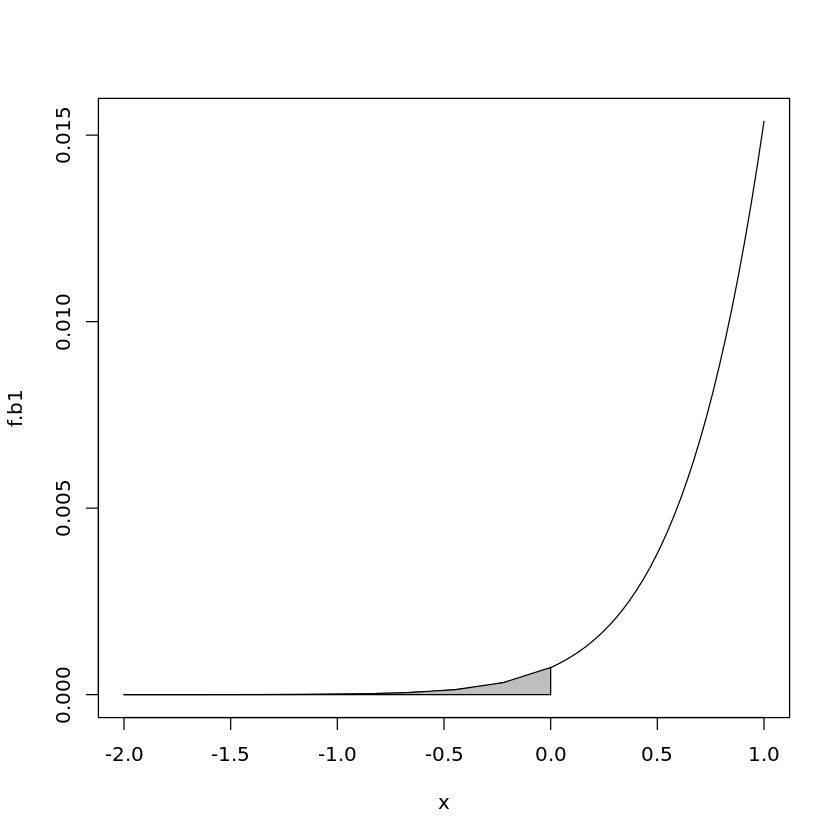

In [15]:
f.b1 <- function(x){(1/(sqrt(2*pi)))*exp(-(x-3.552)^2/2)}
integrate(f.b1,-Inf,0)$value
integrate(f.b1,-Inf,0)$value * 2

#グラフ
plot(f.b1,from = -2, to = 1)
xvals <- seq(-2,0,length = 10)
yvals <- f.b1(xvals)
polygon(c(xvals,rev(xvals)),c(rep(0,10),rev(yvals)),col="grey")

[1] 0.01679331

[1] 0.03358661

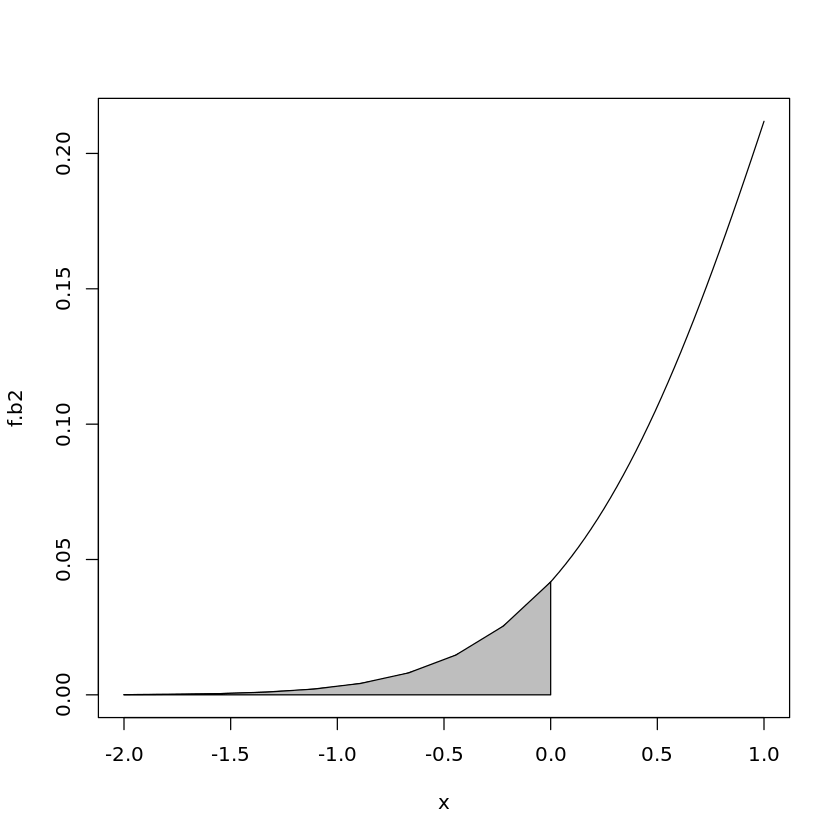

In [16]:
f.b2 <- function(x){(1/(sqrt(2*pi)))*exp(-(x-2.125)^2/2)}
integrate(f.b2,-Inf,0)$value
integrate(f.b2,-Inf,0)$value * 2

# グラフ
plot(f.b2, from = -2, to = 1)
xvals <- seq(-2,0,length = 10)
yvals <- f.b2(xvals)
polygon(c(xvals,rev(xvals)),c(rep(0,10),rev(yvals)),col="grey")

* **最大対数尤度**(maximum log likelihood)$\cdots$**あてはまりの良さ**(goodness of fit)
  * 対数尤度$log L(\beta_1, \beta_2)$が最大になっているところ
    * パラメータの値が最尤推定値$\{\hat{\beta}_1, \hat{\beta}_2\}$となっているところ

In [17]:
logLik(fit)

'log Lik.' -235.3863 (df=2)

* **自由度**(degrees of freedom)$\cdots$上のdfの値
  * 最尤推定したパラメータ数が2個($\beta_1, \beta_2$)であるということ

-----

### ポアソン回帰モデルによる予測

* **予測**(prediction)
* 平均種子数$\lambda$の関数に推定値$\{\hat{\beta}_1, \hat{\beta}_2\}$を代入した関数

　　$\lambda = exp(1.29 + 0.0757x)$
  
    を使う

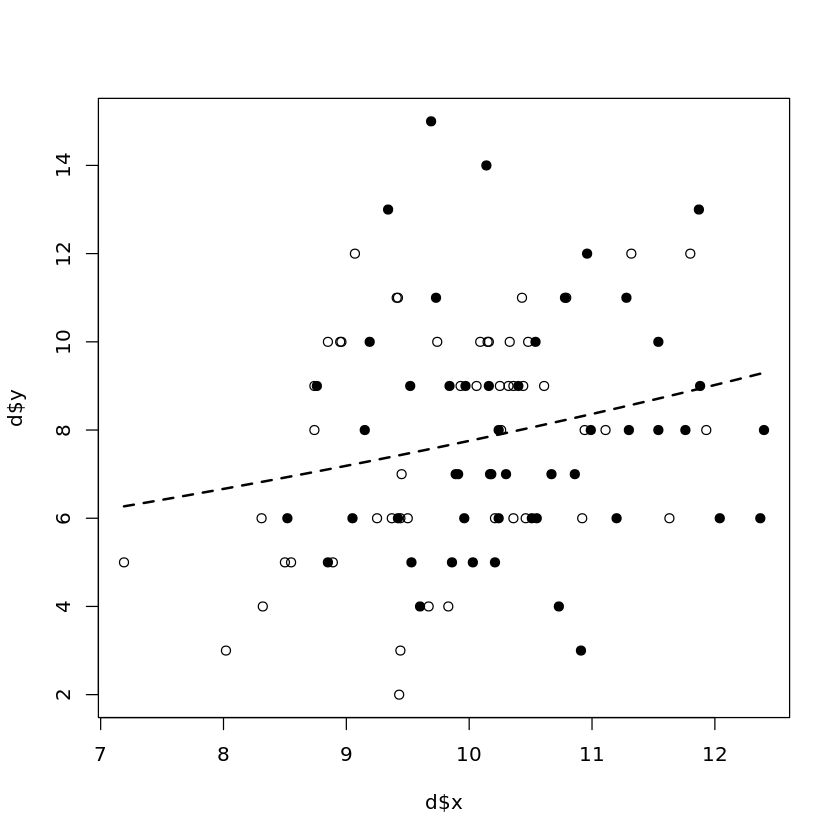

In [25]:
plot(d$x, d$y, pch = c(21, 19)[d$f])
xx <- seq(min(d$x), max(d$x), length = 100)
#lines(xx, exp(1.29 + 0.0757 * xx), lwd = 2)

# 同じ事をpredict()関数を使ってもできる
yy <- predict(fit, newdata = data.frame(x = xx), type = "response") 
lines(xx, yy, lwd = 2, lty=2)

-----

## 説明因子が因子型の統計モデル

ここで, 無視していた施肥効果$f_i$を説明変数として組み込んだモデルを検討する. 

* 特に指定しない場合, 因子型(カテゴリ型)の説明変数を含む線形予測子は**ダミー変数**(dummy variable)に置き換えられている
  * glm()関数を使えば施肥処理の列$f$を説明変数として指定するだけ

植物の体サイズ$x_i$の効果を無視して施肥効果$f_i$だけが影響するモデルの平均値を  
　　$\lambda_i = exp(\beta_1 + \beta_3d_i)$  
として, 説明変数を$f_i$ではなく$d_i$として, 以下の値を取る.  
\begin{eqnarray}
d_i=\left\{ \begin{array}{ll}
0 & (f_i = Cの場合) \\
1 & (f_i = Tの場合) \\
\end{array} \right.
\end{eqnarray}
* 個体$i$が肥料無し($f_i = C$)$\cdots$$\lambda_i = exp(\beta_1)$
* 個体$i$が肥料あり($f_i = T$)$\cdots$$\lambda_i = exp(\beta_1 + \beta_3)$

-----


### 実際にglmに入れてみる

In [19]:
fit.f <- glm(y ~ f, data = d, family = poisson)
fit.f


Call:  glm(formula = y ~ f, family = poisson, data = d)

Coefficients:
(Intercept)           fT  
    2.05156      0.01277  

Degrees of Freedom: 99 Total (i.e. Null);  98 Residual
Null Deviance:	    89.51 
Residual Deviance: 89.48 	AIC: 479.3

#### 出力結果を読む

* Coefficients$\cdots$パラメータの推定値
* 施肥効果$f_i$の係数はfTとなっている$\cdots$説明変数$f_i$がT水準で取る値
  * 説明変数$f_i$にはC(肥料なし)とT(肥料あり)の2水準
* 個体$i$の$f_i$がCなら
  * $\lambda_i = exp(2.05 + 0) = exp(2.05) = 7.77$
* Tなら
  * $\lambda_i = exp(2.05 + 0.0128) = exp(2.0628) = 7.87$


#### 最大対数尤度

In [34]:
logLik(fit.f)

'log Lik.' -237.6273 (df=2)

説明変数が$x_i$だけのときよりもあてはまりが悪い. 

-----

### 因子型説明変数の因子数が3以上になる場合

* 2水準の場合を単純に拡張したもの
* この時の平均種子数
  * $\lambda_i = exp(\beta_1 + \beta_3d_{i, A} + \beta_4d_{i, B})$
* ダミー変数
\begin{eqnarray}
d_{i, A}=\left\{ \begin{array}{ll}
0 & (f_iがTAでない場合) \\
1 & (f_iがTAの場合) \\
\end{array} \right.
\end{eqnarray}
\begin{eqnarray}
d_{i, B}=\left\{ \begin{array}{ll}
0 & (f_iがTBでない場合) \\
1 & (f_iがTBの場合) \\
\end{array} \right.
\end{eqnarray}
* glm()を指定すると, その結果にはfTではなくfTAとfTBが格納されている
  * それぞれ$\beta_3, \beta_4$に対応

-----

## 説明因子が数量型+因子型の統計モデル

**重回帰**(multiple regression)$\cdots$複数の説明変数を持つ統計モデルによるあてはめ

* 平均種子数$\lambda_i$の式
  * $log\lambda_i = \beta_1 + \beta_2x_i + \beta_3d_i$
* Rではモデル式をx + fとするだけで適切に処理してくれる

In [21]:
fit.all <- glm(y ~ x + f, data = d, family = poisson)
fit.all


Call:  glm(formula = y ~ x + f, family = poisson, data = d)

Coefficients:
(Intercept)            x           fT  
    1.26311      0.08007     -0.03200  

Degrees of Freedom: 99 Total (i.e. Null);  97 Residual
Null Deviance:	    89.51 
Residual Deviance: 84.81 	AIC: 476.6

#### 出力結果を読む

* 因子型だけだと肥料の効果fTがプラスだったのに, 今回はマイナスになってしまった
  * 肥料は効果があるのかどうか分からない

#### 最大対数尤度

In [22]:
logLik(fit.all)

'log Lik.' -235.2937 (df=3)

説明変数が$x_i$だけの時よりはあてはまりが良い.
→比較は第4章で検討


-----

### 対数リンク関数の分かりやすさ

* モデル式がglm(y ~ x + f, $\dots$)なので足し算に見える
   * 対数リンク関数を使っているので, かけ算で要因が平均に影響する
* 推定結果を予測としてまとめると
  * 施肥処理$f_i$がC
    * $\lambda_i = exp(1.26 + 0.08x_i)
  * 施肥処理$f_i$がT
    * $\lambda_i = exp(1.26 + 0.08x_i - 0.032)
    * 以下に分解出来る
    * $\lambda_i = exp(1.26) \times exp(0.08x_i) \times exp(-0.032)$
      * $\lambda_i = (定数) \times (サイズの効果) \times (施肥処理の効果)$
      * 説明変数$x_i$が1増加すると$\lambda_i$は$exp(0.08 \times 1) = 1.08$倍に増える
        * 足し算ではなくてかけ算が平均に影響している
      * 施肥処理も同様
        * $exp(-0.032) = 0.969$
        * 肥料をやると種子数の平均が0.969倍になる
        


#### 対数リンク関数を使わなかったら

* **恒等リンク関数**(identity link funciton)$\cdots$リンク関数が特に何もない場合(平均が線形予測子に等しい)
  * 平均種子数$\lambda_i$の予測
    * $\lambda_i = 1.27 + 0.661x_i - 0.205d_i$
      * 施肥処理するととにかく0.205個分減る


#### 「妥当なモデル」

* どのリンク関数が妥当かはあてはまりのよしあしだけでは決まらない
  * 対数リンク関数の方が「まし」な気がする
  * 重要なのは数式が現象をどのように表現しているのかを注意しながら統計モデルを設計すること


-----

### 「何でも正規分布」「何でも直線」には無理がある

* GLMで確率分布は等分散の正規分布かつ「リンク関数なし」(恒等リンク関数)に指定
  * 一番化(generalized)ではない**線形モデル**(Linear Model)
    * あるいは**一般**線形モデル(general linear model)
* ここでは**直線回帰**(linear regression)とポアソン回帰を比較する
  * データ点が与えられたとき, 「とにかく散布図に直線をひけばいい」のか
    * 「世の中は何でも正規分布だから」…?

* 直線回帰はGLMの一部
  * 観測値$\{x_1, x_2, \cdots, x_n\}$と$\{y_1, y_2, \cdots, y_n\}$のペアがある
  * $X = \{x_i\}$を説明変数, $Y = \{y_i\}$を応答変数とよぶ
  * $Y$は平均$\mu_i$で標準偏差$\sigma$の正規分布に従う
  * あるデータ点$i$における平均値$\mu_i = \beta_1 + \beta_2x_i$となる

#### 「どんなデータでも直線回帰」という作法の限界

* 応答変数$y$が数えられるカウントデータ(図3.9)
  * これに対して「何でも正規分布」「$x$と$y$はいつも直線関係」とするのは無理がある
    * 正規分布は連続的な値を扱う確率分布
    * カウントデータなのに平均値の予測がマイナスになる…?
    * 「ばらつき一定」ではなさそうなのに分散一定を仮定している…?
* 図のデータを表現する手段としては直線回帰の統計は「現実ばなれしている」
  * パラメータの推定値を得られるがそもそも「現実ばなれ」した統計モデルを使用している
    * 解析そのものに意味がない
* ポアソン分布は比較的妥当
  * カウントデータに正しく対応
  * 対数リンク関数を使えば平均値は常に非負
  * $y$のばらつきは平均とともに増大する


#### 強引な変数変換わざを避ける

* **変数変換**して直線回帰することとポアソン回帰は全く違う
  * 推定結果は一致しない
    * $y$がゼロに近いときの対数変換はばらつきの「見た目」を少し変えるもの
    * 無理矢理正規分布モデルを当てはめる利点がない